In [4]:
%matplotlib inline
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

import sys
sys.path.insert(0, '/Users/bmmorris/git/gravdark/')

from gravdark import LightCurve, tres2_params
from gravdark.lightcurve import concatenate_light_curves

t2_path = glob('/Users/bmmorris/data/gravdark/tres2/*slc.fits')
t2_lc_whole = LightCurve.from_raw_fits(t2_path, name='TrES-2 b')

t2_masked = LightCurve(**t2_lc_whole.mask_out_of_transit(tres2_params(), oot_duration_fraction=0.5))
t2_transits = t2_masked.get_transit_light_curves(tres2_params())
for transit in t2_transits:
    transit.remove_linear_baseline(tres2_params())
t2 = concatenate_light_curves(t2_transits)

In [10]:
params = tres2_params()
params.b = 0.8540

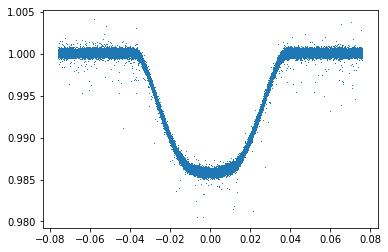

In [6]:
times, all_fluxes = t2.phases(tres2_params()) * tres2_params().per, t2.fluxes

all_fluxes = all_fluxes[np.argsort(times)]
times = times[np.argsort(times)]

plt.plot(times, all_fluxes, ',', rasterized=True)

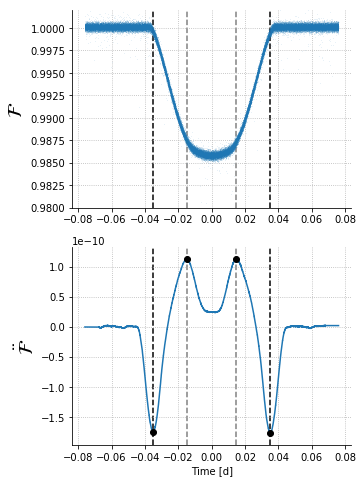

In [8]:
from scipy.signal import savgol_filter

filtered = savgol_filter(all_fluxes, 10001, 2, deriv=2)

fig, ax = plt.subplots(2, 1, figsize=(5, 8))
# ax[0].plot(times, spotless_lc, label='Spotless')
# ax[0].plot(times, spotted_lc, label='Spotted')
ax[0].plot(times, all_fluxes, ',', rasterized=True, alpha=0.1)
from scipy.signal import savgol_filter

n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]

ax[1].plot(times, filtered)

t14 = -1*np.diff(times[mins])[0]
t23 = -1*np.diff(times[maxes])[0]

ax[1].scatter(times[mins], filtered[mins], color='k', zorder=10)
ax[1].scatter(times[maxes], filtered[maxes], color='k', zorder=10)

for ts, c in zip([times[mins], times[maxes]], ['k', 'gray']):
    for t in ts:
        ax[0].axvline(t, ls='--', color=c, zorder=-10)
        ax[1].axvline(t, ls='--', color=c, zorder=-10)

for axis in fig.axes:
    axis.grid(ls=':')
    for s in ['right', 'top']:
        axis.spines[s].set_visible(False)
    axis.legend()
        
ax[0].set_ylabel('$\mathcal{F}$', fontsize=20)
ax[0].set_ylim([0.98, 1.002])
ax[1].set_ylabel('$\ddot{\mathcal{F}}$', fontsize=20)
ax[1].set_xlabel('Time [d]')
fig.savefig('tres2.pdf', bbox_inches='tight')
plt.show()

29001 32904.6329879
29051 32961.7854941
29101 32868.1507592
29151 33031.9792257
29201 33015.0339418
29251 33246.0847116
29301 33235.7281756
29351 33193.5386197
29401 33306.7486834
29451 33435.5117759
29501 33517.71643
29551 33435.4997756
29601 33610.0630334
29651 33517.5986557
29701 33582.7420754
29751 33562.8102054
29801 33722.8965624
29851 33795.5961742
29901 33880.932494
29951 33894.2949195


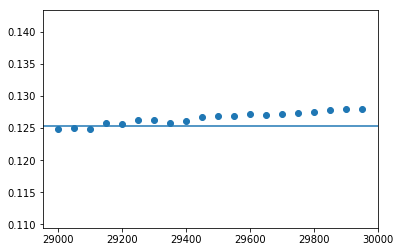

In [32]:

ws = []
ks = []

for w in np.arange(29001, 30001, 50):
    filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
    n = len(times)//2
    mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
    maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
    t14 = abs(np.diff(times[mins])[0])
    t23 = abs(np.diff(times[maxes])[0])
    
    one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    k = (one_plus_k - one_minus_k)/2

    print(w, (t14 - t23) * len(times) / times.ptp())
    
    ws.append(w)
    ks.append(k)

ws = np.array(ws)
ks = np.array(ks)

plt.scatter(ws, ks)

wmid = 55
# k = np.median(ks[(ws < 70) & (ws > 40)])
# kerr = np.ptp(ks[(ws < 70) & (ws > 40)])/2
# plt.errorbar(wmid, k, yerr=kerr, xerr=15, fmt='s', color='k')

# print(k, kerr)
plt.axhline(params.rp)
# plt.ylim([0, 0.25])

In [30]:

w = 29201
filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
t14 = abs(np.diff(times[mins])[0])
t23 = abs(np.diff(times[maxes])[0])
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2

abs(k - params.rp)/params.rp

0.0022326855644305399

In [31]:
(t14 - t23) * len(times) / times.ptp()

33015.033941767128